### Step 1. 讀資料進來

In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv("features.csv")

In [3]:
stopword = open("Chinese_stopwords.txt").read()

In [4]:
clean_token = []
for i in data["tokens"]:
    token_list = i.split(" ")
    clean = ""
    for token in token_list:
        if token not in stopword:
            clean = clean+" "+token
    clean_token.append(clean)

In [5]:
data["clean"] = clean_token

### TF-IDF

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() #初始化工具
vectorized_data = vectorizer.fit_transform(data["clean"])

In [75]:
tfidf_arr = vectorizer.get_feature_names_out() # 取出每一個被計算的詞
tfidf_data = vectorizer.transform(data["clean"]) 
annotation = tfidf_data.toarray()

In [76]:
tfidf = pd.DataFrame(annotation, columns=[tfidf_arr])

In [77]:
tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Columns: 12729 entries, ('007',) to ('４８',)
dtypes: float64(12729)
memory usage: 805.0 MB


### 分離特徵跟答案

In [105]:
# 答案
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label = data[["label"]].apply(LabelEncoder().fit_transform)

### 區分訓練集跟測試集

In [115]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 168)
feature_undersampled, label_undersampled = undersample.fit_resample(tfidf, label)

In [164]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_undersampled, label_undersampled, test_size = 0.2, random_state = 168)

### 模型訓練

#### Naive Bayes

In [165]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB_model = NB.fit(feature_train, label_train)

e:\Python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier
DT_gini = DecisionTreeClassifier(criterion = "gini", random_state = 168)
DT_gini_model = DT_gini.fit(feature_train, label_train)

In [167]:
DT_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 168)
DT_entropy_model = DT_gini.fit(feature_train, label_train)

#### Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

RF_gini = RandomForestClassifier(criterion = "gini", random_state = 143)
RF_gini_model = RF_gini.fit(feature_train, label_train)

C:\Users\user\AppData\Local\Temp\ipykernel_3528\424854700.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_gini_model = RF_gini.fit(feature_train, label_train)


In [169]:
RF_entropy = RandomForestClassifier(criterion = "entropy", random_state = 143)
RF_entropy_model = RF_entropy.fit(feature_train, label_train)

C:\Users\user\AppData\Local\Temp\ipykernel_3528\3780857554.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_entropy_model = RF_entropy.fit(feature_train, label_train)


#### Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR_model = LR.fit(feature_train, label_train)

e:\Python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### SVM

In [171]:
from sklearn.svm import LinearSVC
SVM_linear = LinearSVC(random_state=143, tol=1e-5)
SVM_linear_model = SVM_linear.fit(feature_train, label_train)

e:\Python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8289 entries, 0 to 8288
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   8289 non-null   int64
dtypes: int64(1)
memory usage: 129.5 KB


### 預測

In [173]:
NB_prediction = NB_model.predict(feature_test)
DT_gini_prediction = DT_gini_model.predict(feature_test)
DT_entropy_prediction = DT_entropy_model.predict(feature_test)
RF_gini_prediction = RF_gini_model.predict(feature_test)
RF_entropy_prediction = RF_entropy_model.predict(feature_test)
LR_prediction = LR_model.predict(feature_test)
SVM_linear_prediction = SVM_linear_model.predict(feature_test)

### 評估結果

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, accuracy_score

def model_metrics(prediction, label): 
    
    print(ConfusionMatrixDisplay.from_predictions(label, prediction, cmap = "Wistia")) 
    evaluation = precision_recall_fscore_support(label, prediction, average='macro') 
    accuracy = accuracy_score(label, prediction) # 計算accuracy

    print("accuracy: " + str(round(accuracy, 2)) + "\nprecision: " + str(round(evaluation[0], 2)) + "\nrecall: " + str(round(evaluation[1], 2)) + "\nfscore: " + str(round(evaluation[2],2)))

#### Naive Bayes

accuracy: 0.67
precision: 0.67
recall: 0.66
fscore: 0.66


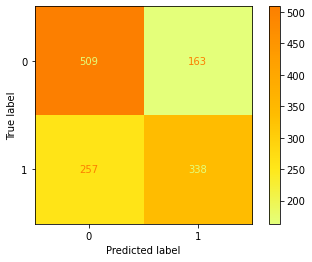

In [175]:
model_metrics(NB_prediction, label_test)

#### Decision Tree

accuracy: 0.67
precision: 0.67
recall: 0.67
fscore: 0.67


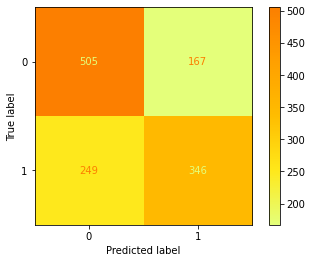

In [176]:
model_metrics(DT_gini_prediction, label_test)

accuracy: 0.67
precision: 0.67
recall: 0.67
fscore: 0.67


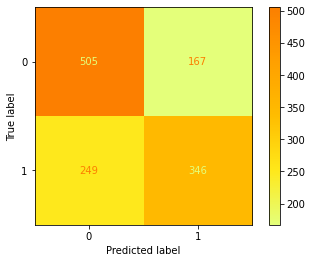

In [177]:
model_metrics(DT_entropy_prediction, label_test)

#### Random Forest

accuracy: 0.71
precision: 0.71
recall: 0.71
fscore: 0.71


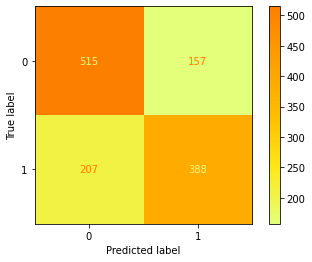

In [178]:
model_metrics(RF_gini_prediction, label_test)

accuracy: 0.71
precision: 0.71
recall: 0.71
fscore: 0.71


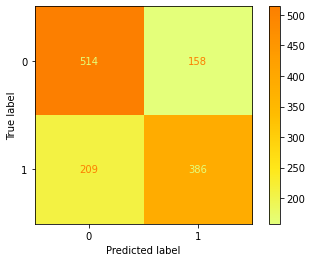

In [179]:
model_metrics(RF_entropy_prediction, label_test)

#### Logistic Regression

accuracy: 0.72
precision: 0.72
recall: 0.72
fscore: 0.72


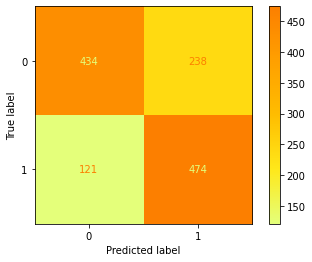

In [180]:
model_metrics(LR_prediction, label_test)

#### SVM

accuracy: 0.72
precision: 0.72
recall: 0.72
fscore: 0.72


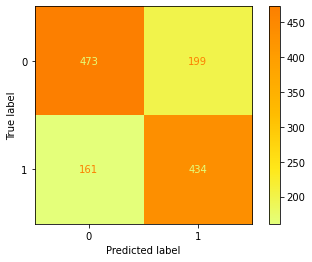

In [181]:
model_metrics(SVM_linear_prediction, label_test)

In [183]:
LR_model.coef_

array([[-0.12615653,  0.03463307, -0.24789266, ..., -0.16939999,
        -0.21301271,  0.        ]])

In [184]:
SVM_linear_model.coef_

array([[-0.14102412,  0.06624818, -0.34887048, ..., -0.25951863,
        -0.21423376,  0.        ]])